<a href="https://colab.research.google.com/github/thiagobg/bradr/blob/master/techsbankus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
pip install ffn

In [0]:
import ffn as f

In [0]:
%matplotlib inline

In [0]:
#@title Date Range

date_start = '2018-07-01'  #@param {type: "date"}
date_end = '2019-07-01'  #@param {type: "date"}
#@markdown 

In [163]:
data = f.get('GOOG, AMZN, AAPL, MSFT, GS, UBER', start=date_start, end=date_end)
print(data.head())

                   goog         amzn  ...          gs       uber
Date                                  ...                       
2019-05-10  1164.270020  1889.979980  ...  201.143417  41.570000
2019-05-13  1132.030029  1822.680054  ...  194.095184  37.099998
2019-05-14  1120.439941  1840.119995  ...  195.399307  39.959999
2019-05-15  1164.209961  1871.150024  ...  195.518768  41.290001
2019-05-16  1178.979980  1907.569946  ...  198.246475  43.000000

[5 rows x 6 columns]


In [0]:
returns = data.to_log_returns().dropna()

In [165]:
print(returns.head())

                goog      amzn      aapl      msft        gs      uber
Date                                                                  
2019-05-13 -0.028082 -0.036258 -0.059877 -0.030184 -0.035669 -0.113762
2019-05-14 -0.010291  0.009523  0.015706  0.011126  0.006697  0.074262
2019-05-15  0.038321  0.016722  0.011908  0.013984  0.000611  0.032741
2019-05-16  0.012607  0.019277 -0.004409  0.022829  0.013855  0.040580
2019-05-17 -0.014249 -0.020427 -0.005698 -0.006693 -0.008624 -0.025676


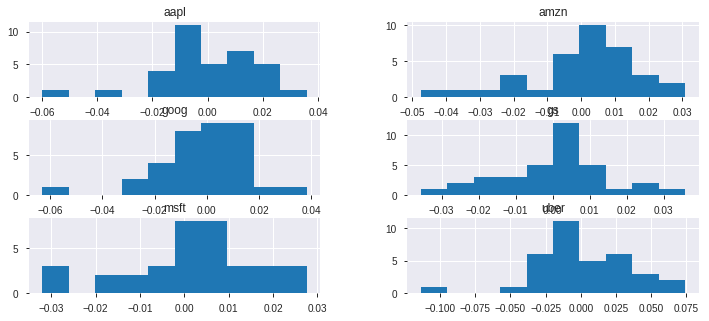

In [166]:
ax = returns.hist(figsize=(12, 5))

In [167]:
returns.corr().as_format('.2f')

,goog,amzn,aapl,msft,gs,uber
goog,1.00,0.83,0.56,0.79,0.38,0.14
amzn,0.83,1.00,0.71,0.88,0.55,0.27
aapl,0.56,0.71,1.00,0.77,0.64,0.39
msft,0.79,0.88,0.77,1.00,0.54,0.35
gs,0.38,0.55,0.64,0.54,1.00,0.41
uber,0.14,0.27,0.39,0.35,0.41,1.00


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

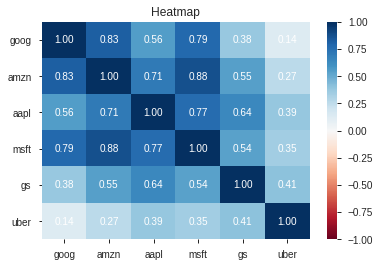

In [168]:
returns.plot_corr_heatmap()

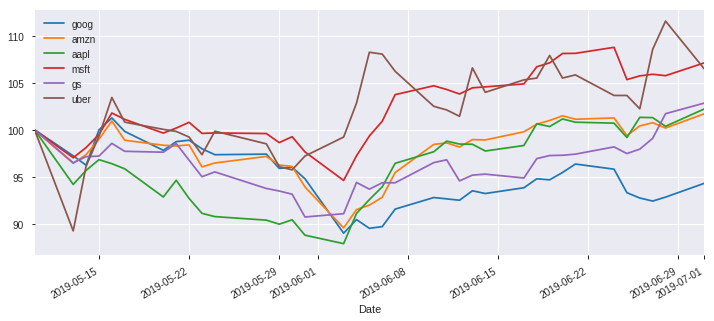

In [169]:
ax = data.rebase().plot(figsize=(12,5))

In [170]:
perf = data.calc_stats()

/usr/local/lib/python3.6/dist-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


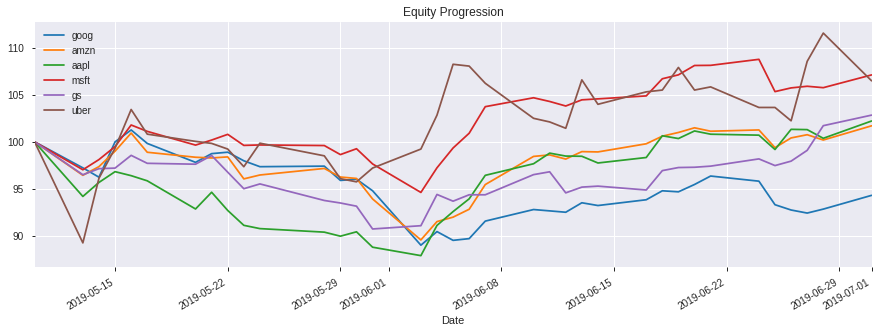

In [171]:
perf.plot()

In [172]:
print (perf.display())

Stat                 goog        amzn        aapl        msft        gs          uber
-------------------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2019-05-10  2019-05-10  2019-05-10  2019-05-10  2019-05-10  2019-05-10
End                  2019-07-01  2019-07-01  2019-07-01  2019-07-01  2019-07-01  2019-07-01
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         -5.70%      1.70%       2.22%       7.12%       2.84%       6.50%
Daily Sharpe         -1.42       0.59        0.69        2.22        0.97        1.10
Daily Sortino        -2.00       0.87        1.07        3.57        1.59        1.85
CAGR                 -33.76%     12.60%      16.65%      62.12%      21.76%      55.58%
Max Drawdown         -12.11%     -11.26%     -12.11%     -7.05%      -9.27%      -10.75%
Calmar Ratio         -2.79       1.12        1.37        8.81        2.35        5.17

MTD                  1.58% 

In [0]:
import pandas as pd

In [0]:
import pandas_profiling as pf

In [175]:
pf.ProfileReport(returns)

Number of variables,7
Number of observations,35
Total Missing (%),0.0%
Total size in memory,2.0 KiB
Average record size in memory,58.3 B
Numeric,6
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [176]:
pf.ProfileReport(data)

Number of variables,7
Number of observations,36
Total Missing (%),0.0%
Total size in memory,2.0 KiB
Average record size in memory,58.2 B
Numeric,6
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0
